# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv as csv
import os as os
import seaborn as sns
from datetime import datetime
import openweathermapy as owm

#Import open weather map API key
from api_keys import api_key

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [23]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
# import API Key from config file
from api_keys import api_key
# Create settings dictionary with information we're interested in
settings = {"units": "imperial", "appid": api_key}

# Initialize data frame to store data from API calls
WeatherPy_df =pd.DataFrame(columns = ["City","Cloudiness", "Country",
                                    "Date","Humidity","Lat", 
                                    "Lng","Max Temp","Wind Speed"])

In [25]:
count = 1 # counter to count the number of calls to API
err = 0 # error count to record how many cities the API responds back with no data.
sets = 0 # counter to count the number of call sets
index = 0 # index for the data frame WeatherPy data frame
#Get current time
t0 =time.time()
print(f'Beginning Data Retrieval \n ........................')
for city in cities:
    try:
        city1 = city.replace(" ", "%20") # remove space in city name so the URL retrieved is not broken.
        print(f'Processing Record {count} of Set {sets} | {city}' )
        print(f'{owm.BASE_URL}weather?q={city1}&units=imperial&APPID={api_key}')
        city_stats = owm.get_current(city, **settings)
        WeatherPy_df.set_value(index, "City", city_stats["name"])
        WeatherPy_df.set_value(index, "Cloudiness", city_stats("clouds.all"))
        WeatherPy_df.set_value(index, "Country", city_stats("sys.country"))
        WeatherPy_df.set_value(index, "Date", city_stats("dt"))
        WeatherPy_df.set_value(index, "Max Temp", city_stats("main.temp_max"))
        WeatherPy_df.set_value(index, "Wind Speed", city_stats("wind.speed"))
        WeatherPy_df.set_value(index, "Lat", city_stats("coord.lat"))
        WeatherPy_df.set_value(index, "Lng", city_stats("coord.lon"))
        WeatherPy_df.set_value(index, "Humidity", city_stats("main.humidity"))
        index = index +1 
    except Exception as e:
        print(e)
        err= err+1
    count = count+1
    if count == 51: # loop to limit 50 API calls per minute. The OpenWeatherMap API limit is 60 calls/min
        t1=time.time()
        count = 1 
        sets = sets+1
        time.sleep(60-(t1-t0))
        t0=time.time()

print("end of stats loop")
print(f'Could not get data for {err} cities')

Beginning Data Retrieval 
 ........................
Processing Record 1 of Set 0 | guerrero negro
http://api.openweathermap.org/data/2.5/weather?q=guerrero%20negro&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed


C:\Users\Eduardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\Eduardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\Eduardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Users\Eduardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Eduardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future re

Processing Record 2 of Set 0 | cidreira
http://api.openweathermap.org/data/2.5/weather?q=cidreira&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 3 of Set 0 | butaritari
http://api.openweathermap.org/data/2.5/weather?q=butaritari&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 4 of Set 0 | lebu
http://api.openweathermap.org/data/2.5/weather?q=lebu&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 5 of Set 0 | katsuura
http://api.openweathermap.org/data/2.5/weather?q=katsuura&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 6 of Set 0 | tezu
http://api.openweathermap.org/data/2.5/weather?q=tezu&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 7 of Set 0 | rikitea
http://api.openweathermap.org/data/2.5/weather?q=rikitea&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 8 of Set 0 | palabuhanratu
http://api.openweathermap.org/data/2.5/weather?q=palabuha

Processing Record 5 of Set 1 | amderma
http://api.openweathermap.org/data/2.5/weather?q=amderma&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
HTTP Error 404: Not Found
Processing Record 6 of Set 1 | victoria
http://api.openweathermap.org/data/2.5/weather?q=victoria&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 7 of Set 1 | pacific grove
http://api.openweathermap.org/data/2.5/weather?q=pacific%20grove&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 8 of Set 1 | lockhart
http://api.openweathermap.org/data/2.5/weather?q=lockhart&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 9 of Set 1 | ust-maya
http://api.openweathermap.org/data/2.5/weather?q=ust-maya&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 10 of Set 1 | narsaq
http://api.openweathermap.org/data/2.5/weather?q=narsaq&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 11 of Set 1 | kapaa
http://api.openwe

Processing Record 8 of Set 2 | pangoa
http://api.openweathermap.org/data/2.5/weather?q=pangoa&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 9 of Set 2 | atuona
http://api.openweathermap.org/data/2.5/weather?q=atuona&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 10 of Set 2 | alice springs
http://api.openweathermap.org/data/2.5/weather?q=alice%20springs&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 11 of Set 2 | hulan
http://api.openweathermap.org/data/2.5/weather?q=hulan&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 12 of Set 2 | taolanaro
http://api.openweathermap.org/data/2.5/weather?q=taolanaro&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
HTTP Error 404: Not Found
Processing Record 13 of Set 2 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?q=cabo%20san%20lucas&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 14 of Set 2 | bredasdorp

Processing Record 10 of Set 3 | salalah
http://api.openweathermap.org/data/2.5/weather?q=salalah&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 11 of Set 3 | verkhnevilyuysk
http://api.openweathermap.org/data/2.5/weather?q=verkhnevilyuysk&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 12 of Set 3 | sao filipe
http://api.openweathermap.org/data/2.5/weather?q=sao%20filipe&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 13 of Set 3 | zhigansk
http://api.openweathermap.org/data/2.5/weather?q=zhigansk&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 14 of Set 3 | golden
http://api.openweathermap.org/data/2.5/weather?q=golden&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 15 of Set 3 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?q=tuktoyaktuk&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 16 of Set 3 | camana
http://api.openweatherm

Processing Record 13 of Set 4 | okha
http://api.openweathermap.org/data/2.5/weather?q=okha&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 14 of Set 4 | khatanga
http://api.openweathermap.org/data/2.5/weather?q=khatanga&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 15 of Set 4 | neuquen
http://api.openweathermap.org/data/2.5/weather?q=neuquen&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 16 of Set 4 | viedma
http://api.openweathermap.org/data/2.5/weather?q=viedma&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 17 of Set 4 | vila franca do campo
http://api.openweathermap.org/data/2.5/weather?q=vila%20franca%20do%20campo&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 18 of Set 4 | grimari
http://api.openweathermap.org/data/2.5/weather?q=grimari&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
HTTP Error 404: Not Found
Processing Record 19 of Set 4 | matara
htt

Processing Record 16 of Set 5 | bosaso
http://api.openweathermap.org/data/2.5/weather?q=bosaso&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 17 of Set 5 | rosetta
http://api.openweathermap.org/data/2.5/weather?q=rosetta&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 18 of Set 5 | lebyazhye
http://api.openweathermap.org/data/2.5/weather?q=lebyazhye&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 19 of Set 5 | ecoporanga
http://api.openweathermap.org/data/2.5/weather?q=ecoporanga&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 20 of Set 5 | cullinan
http://api.openweathermap.org/data/2.5/weather?q=cullinan&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 21 of Set 5 | sayyan
http://api.openweathermap.org/data/2.5/weather?q=sayyan&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 22 of Set 5 | nishihara
http://api.openweathermap.org/data/2.5/weath

Processing Record 18 of Set 6 | yhu
http://api.openweathermap.org/data/2.5/weather?q=yhu&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 19 of Set 6 | zheleznodorozhnyy
http://api.openweathermap.org/data/2.5/weather?q=zheleznodorozhnyy&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 20 of Set 6 | turje
http://api.openweathermap.org/data/2.5/weather?q=turje&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 21 of Set 6 | timra
http://api.openweathermap.org/data/2.5/weather?q=timra&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 22 of Set 6 | jackson
http://api.openweathermap.org/data/2.5/weather?q=jackson&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 23 of Set 6 | aasiaat
http://api.openweathermap.org/data/2.5/weather?q=aasiaat&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 24 of Set 6 | waipawa
http://api.openweathermap.org/data/2.5/weather?q=w

Processing Record 21 of Set 7 | lincolnia
http://api.openweathermap.org/data/2.5/weather?q=lincolnia&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 22 of Set 7 | noumea
http://api.openweathermap.org/data/2.5/weather?q=noumea&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 23 of Set 7 | hire
http://api.openweathermap.org/data/2.5/weather?q=hire&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
HTTP Error 404: Not Found
Processing Record 24 of Set 7 | lake city
http://api.openweathermap.org/data/2.5/weather?q=lake%20city&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 25 of Set 7 | ahuimanu
http://api.openweathermap.org/data/2.5/weather?q=ahuimanu&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 26 of Set 7 | santo domingo
http://api.openweathermap.org/data/2.5/weather?q=santo%20domingo&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 27 of Set 7 | bokajan
http://api

Processing Record 25 of Set 8 | pevek
http://api.openweathermap.org/data/2.5/weather?q=pevek&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 26 of Set 8 | evensk
http://api.openweathermap.org/data/2.5/weather?q=evensk&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 27 of Set 8 | kendal
http://api.openweathermap.org/data/2.5/weather?q=kendal&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 28 of Set 8 | korla
http://api.openweathermap.org/data/2.5/weather?q=korla&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
HTTP Error 404: Not Found
Processing Record 29 of Set 8 | vangaindrano
http://api.openweathermap.org/data/2.5/weather?q=vangaindrano&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 30 of Set 8 | kiama
http://api.openweathermap.org/data/2.5/weather?q=kiama&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 31 of Set 8 | tevriz
http://api.openweathermap.org/data/

Processing Record 28 of Set 9 | conneaut
http://api.openweathermap.org/data/2.5/weather?q=conneaut&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 29 of Set 9 | birao
http://api.openweathermap.org/data/2.5/weather?q=birao&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 30 of Set 9 | karsun
http://api.openweathermap.org/data/2.5/weather?q=karsun&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 31 of Set 9 | yantal
http://api.openweathermap.org/data/2.5/weather?q=yantal&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 32 of Set 9 | tiksi
http://api.openweathermap.org/data/2.5/weather?q=tiksi&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 33 of Set 9 | salon
http://api.openweathermap.org/data/2.5/weather?q=salon&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 34 of Set 9 | jashpurnagar
http://api.openweathermap.org/data/2.5/weather?q=jashpurnagar&u

Processing Record 31 of Set 10 | tarudant
http://api.openweathermap.org/data/2.5/weather?q=tarudant&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
HTTP Error 404: Not Found
Processing Record 32 of Set 10 | aswan
http://api.openweathermap.org/data/2.5/weather?q=aswan&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 33 of Set 10 | castrillon
http://api.openweathermap.org/data/2.5/weather?q=castrillon&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 34 of Set 10 | hami
http://api.openweathermap.org/data/2.5/weather?q=hami&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 35 of Set 10 | constantine
http://api.openweathermap.org/data/2.5/weather?q=constantine&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 36 of Set 10 | fairview
http://api.openweathermap.org/data/2.5/weather?q=fairview&units=imperial&APPID=5e95f20b3aa75971c4f8361ada4b91ed
Processing Record 37 of Set 10 | cape canaveral
http:/

ValueError: sleep length must be non-negative

In [26]:

import csv

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:

# Display the count of cities with weather data
WeatherPy_df.count()

City          494
Cloudiness    494
Country       494
Date          494
Humidity      494
Lat           494
Lng           494
Max Temp      494
Wind Speed    494
dtype: int64

In [28]:
# save to csv file
WeatherPy_df.to_csv("WeatherPy.csv", encoding='utf-8', index=False)

# Display the city weather data frame
WeatherPy_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Guerrero Negro,0,MX,1551057081,51,27.97,-114.04,64.57,13.91
1,Cidreira,92,BR,1551057081,100,-30.17,-50.22,70.42,3.06
2,Butaritari,44,KI,1551057082,100,3.07,172.79,83.51,17.6
3,Lebu,20,ET,1551052800,72,8.96,38.73,59,4.7
4,Katsuura,40,JP,1551054720,76,33.93,134.5,48.2,11.41
5,Tezu,92,IN,1551056930,77,27.93,96.16,49.72,1.83
6,Rikitea,80,PF,1551056996,100,-23.12,-134.97,79.96,12.46
7,Saint-Philippe,90,CA,1551055080,88,45.36,-73.48,37.4,24.16
8,Lorengau,12,PG,1551056916,96,-2.02,147.27,83.11,4.97
9,Bilibino,76,RU,1551057083,70,68.06,166.44,-11.8,3.18


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

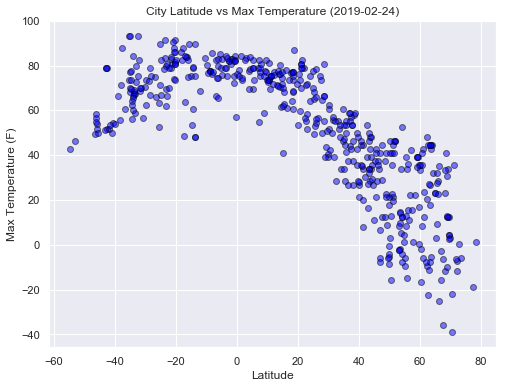

In [35]:
plt.figure(figsize=(8,6))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Max Temp"], color='blue',edgecolor="black", alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temperature ({datetime.now().date()})')
plt.savefig("LatVsTemp.png")
plt.show()



#### Latitude vs. Humidity Plot

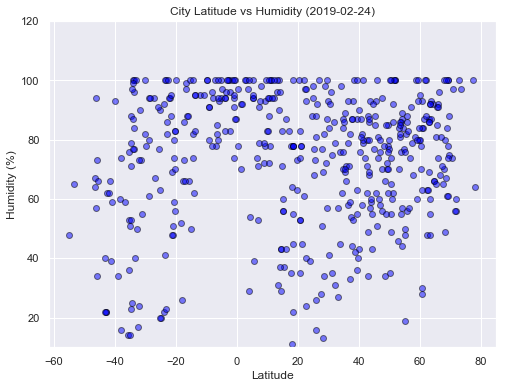

In [38]:
plt.figure(figsize=(8,6))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Humidity"], color='blue',edgecolor="black", alpha=0.5)
plt.ylim(10,120)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({datetime.now().date()})')
plt.savefig("LatVsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

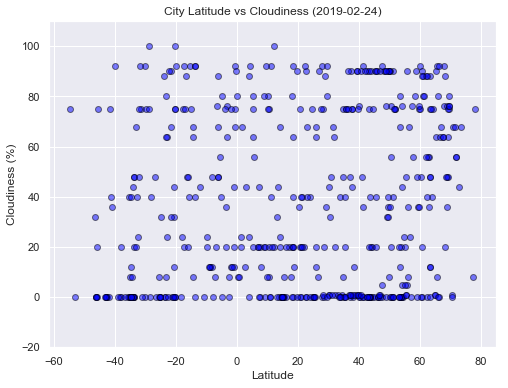

In [39]:
plt.figure(figsize=(8,6))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Cloudiness"], color='blue',edgecolor="black", alpha=0.5)

plt.ylim(-20,(WeatherPy_df["Cloudiness"].max()+10))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ({datetime.now().date()})')
plt.savefig("LatVsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

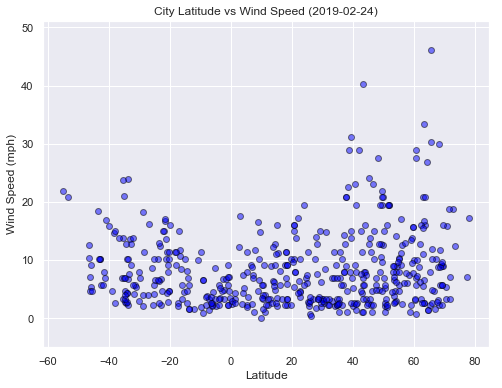

In [40]:
plt.figure(figsize=(8,6))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Wind Speed"], color='blue',edgecolor="black", alpha=0.5)

plt.ylim((WeatherPy_df["Wind Speed"].min()-5),(WeatherPy_df["Wind Speed"].max()+5))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed ({datetime.now().date()})')
plt.savefig("LatVsWind.png")
plt.show()


In [ ]:
### finnnnnnnnnnnn      ####       :) 